In [2]:
import os
import sys
import path
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
sys.path.insert(0, path.Path(os.getcwd()).joinpath("..").abspath())

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import set_matplotlib_formats

%matplotlib inline
# set_matplotlib_formats("svg")
sns.set_theme(style="whitegrid", font_scale=2, rc={"figure.figsize": (18, 9)})

## Common

In [4]:
import os

import numpy as np
import pandas as pd
import torch

from captum.attr import visualization as viz
from captum.attr import (
    Saliency, 
    IntegratedGradients,
    NoiseTunnel,
    LayerGradCam, 
    FeatureAblation, 
    LayerActivation, 
    LayerAttribution
)

from matplotlib.colors import LinearSegmentedColormap

----

## TS-based

In [5]:
from src.settings import DATA_ROOT, LOGS_ROOT
from src.ts import load_ABIDE1, load_OASIS, load_FBIRN

### ABIDE1

In [5]:
# ABIDE1
features, labels = load_ABIDE1()
features = np.swapaxes(features, 1, 2)  # [n_samples; seq_len; n_features]

In [6]:
# ABIDE1
# one-sample
# feature = features[5].astype(np.float32)
# feature = torch.tensor(feature).unsqueeze(0)
# feature.requires_grad = True
# all
feature = features.astype(np.float32)
# print(feature)
feature = torch.tensor(feature)
feature.requires_grad = True

print(feature.shape)

torch.Size([569, 140, 53])


In [7]:
# ABIDE1
from src.scripts.tune_ts_mlp import MLP
# AUC: 0.7030812324929973
model = MLP(
    input_size=53, 
    output_size=2,
    hidden_size=75, 
    num_layers=1, 
    dropout=0.30508830411407517,
)
logdir = LOGS_ROOT.joinpath("220428.185640-ts-mlp-qFalse/0002/model.best.pth")
checkpoint = torch.load(logdir, map_location=lambda storage, loc: storage)
# print(checkpoint)
model.load_state_dict(checkpoint)
model = model.eval()
# ATTENTION: captum model should have [bs; ...] inputs and [bs; ...] outputs
# output = torch.sigmoid(model(feature))

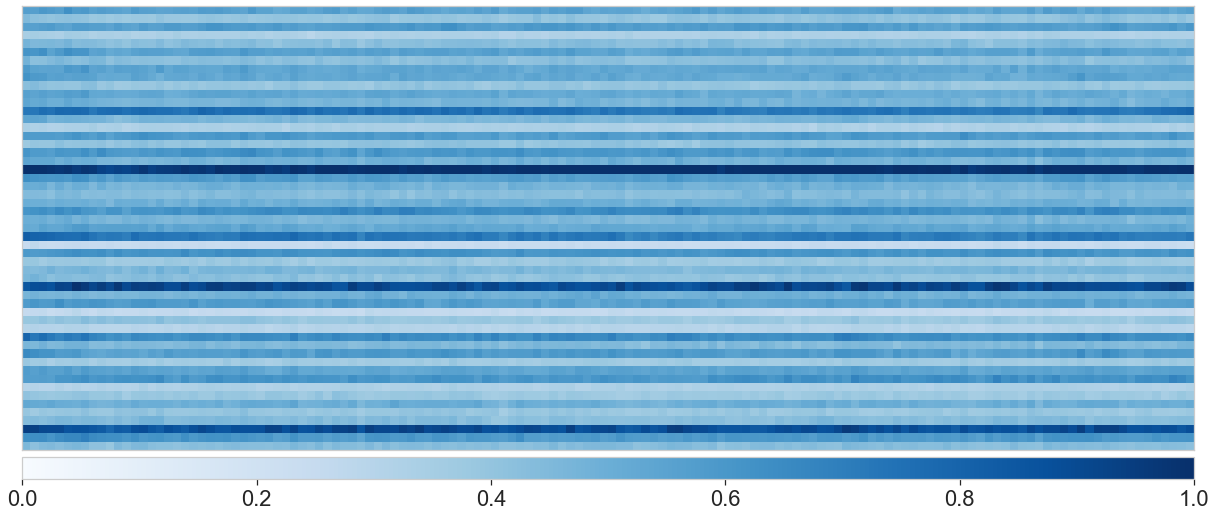

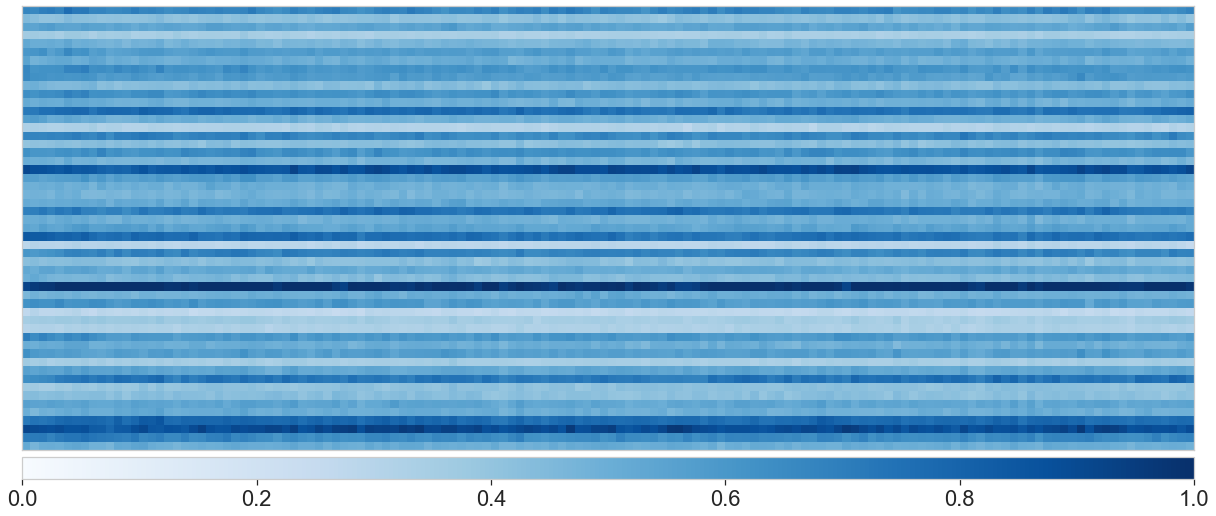

In [8]:
# ABIDE1
saliency = Saliency(model)

model.zero_grad()
grads0 = saliency.attribute(feature, target=0)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='negative',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
grads1 = saliency.attribute(feature, target=1)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

Approximation delta:  tensor([1.8682e-01, 5.8389e-02, 3.9922e-01, 3.2490e-01, 1.0431e+00, 2.4755e-01,
        1.0133e-01, 1.3554e-01, 1.2831e-02, 2.4220e-01, 9.3750e-02, 5.8826e-01,
        1.2293e-01, 4.5787e-01, 3.3134e-01, 2.3495e-01, 2.9228e-01, 4.7438e-02,
        1.8281e-01, 1.7585e-01, 4.2856e-02, 5.3347e-02, 2.1468e-01, 1.8127e-01,
        1.3148e-01, 3.6978e-02, 6.2519e-02, 2.3353e-01, 3.6763e-01, 4.3891e-01,
        1.8704e-01, 1.1825e-01, 1.9595e-01, 5.8880e-02, 9.9800e-02, 8.3272e-01,
        1.1489e-01, 1.0411e-01, 5.1210e-01, 2.0291e-01, 2.0544e-01, 1.9659e-01,
        1.8201e-02, 4.1439e-01, 7.5455e-02, 2.8172e-01, 1.8158e-01, 1.7915e-01,
        1.9340e-01, 2.0908e-01, 2.2184e-01, 3.3993e-01, 8.0880e-02, 3.0729e-01,
        1.8166e-01, 2.2711e-01, 2.6490e-01, 4.7086e-01, 4.3648e-02, 1.2070e-01,
        1.4349e-01, 2.4137e-01, 3.1850e-01, 4.0479e-01, 2.8031e-01, 3.7296e-02,
        3.8804e-01, 5.4997e-02, 1.0185e-01, 3.2363e-02, 1.8635e-01, 9.8930e-02,
        2.3319e-02

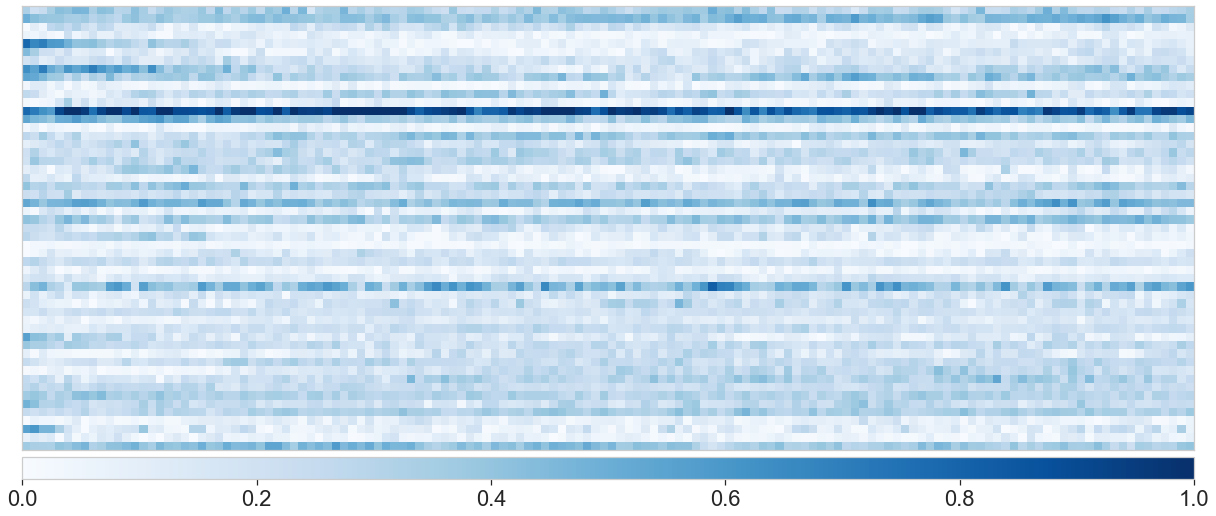

Approximation delta:  tensor([0.0680, 0.0155, 0.1231, 0.0257, 0.7007, 0.5104, 0.0946, 0.1956, 0.1366,
        0.4216, 0.2816, 0.7479, 0.2303, 0.5488, 0.4207, 0.1373, 0.2834, 0.2137,
        0.2275, 0.2113, 0.2158, 0.0309, 0.2342, 0.3020, 0.1412, 0.0596, 0.0606,
        0.1233, 0.4019, 0.5149, 0.2070, 0.0879, 0.0852, 0.0046, 0.0471, 0.9341,
        0.2180, 0.1752, 0.6389, 0.4519, 0.0758, 0.3467, 0.1885, 0.2759, 0.1020,
        0.1212, 0.1559, 0.1838, 0.3411, 0.0380, 0.0455, 0.2434, 0.3259, 0.0150,
        0.2675, 0.0338, 0.0678, 0.4359, 0.1488, 0.0725, 0.0542, 0.1730, 0.0956,
        0.5288, 0.1438, 0.0472, 0.3814, 0.1419, 0.1970, 0.0809, 0.1935, 0.1712,
        0.0973, 0.3932, 0.1167, 0.2618, 0.0980, 0.0224, 0.0820, 0.5405, 0.0115,
        0.3827, 0.0468, 0.2418, 0.0130, 0.1333, 0.5401, 0.2128, 0.1955, 0.4986,
        0.0692, 0.1541, 0.1748, 0.3752, 0.2806, 0.2653, 0.0680, 0.1726, 0.1752,
        0.2552, 0.1572, 0.0865, 0.4361, 0.0116, 0.0913, 0.3584, 0.4375, 0.2520,
        0.1824, 0.

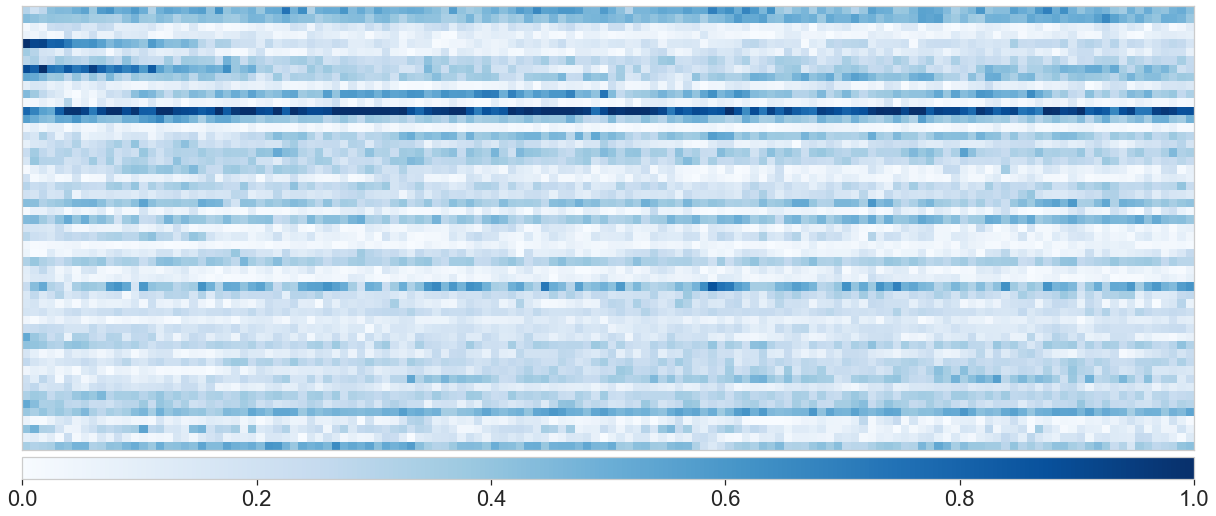

In [9]:
# ABIDE1
ig = IntegratedGradients(model)


model.zero_grad()
attr_ig0, delta = ig.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig1, delta = ig.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

In [10]:
# ABIDE1
ig = IntegratedGradients(model)
nt = NoiseTunnel(ig)


model.zero_grad()
attr_ig_nt0, delta = nt.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig_nt1, delta = nt.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()



### FBIRN

In [5]:
# FBIRN
features, labels = load_FBIRN()
features = np.swapaxes(features, 1, 2)  # [n_samples; seq_len; n_features]

In [6]:
# FBIRN
# one-sample
# feature = features[5].astype(np.float32)
# feature = torch.tensor(feature).unsqueeze(0)
# feature.requires_grad = True
# all
feature = features.astype(np.float32)
# print(feature)
feature = torch.tensor(feature)
feature.requires_grad = True

print(feature.shape)

torch.Size([311, 140, 53])


In [7]:
# FBIRN
from src.scripts.tune_ts_mlp import MLP
# AUC: 0.7376688197298884
model = MLP(
    input_size=53, 
    output_size=2,
    hidden_size=141, 
    num_layers=3, 
    dropout=0.5339434622121335,
)
logdir = LOGS_ROOT.joinpath("220428.220948-ts-mlp-fbirn-qFalse/0004/model.best.pth")
checkpoint = torch.load(logdir, map_location=lambda storage, loc: storage)
model.load_state_dict(checkpoint)
model = model.eval()
# ATTENTION: captum model should have [bs; ...] inputs and [bs; ...] outputs
# output = torch.sigmoid(model(feature))

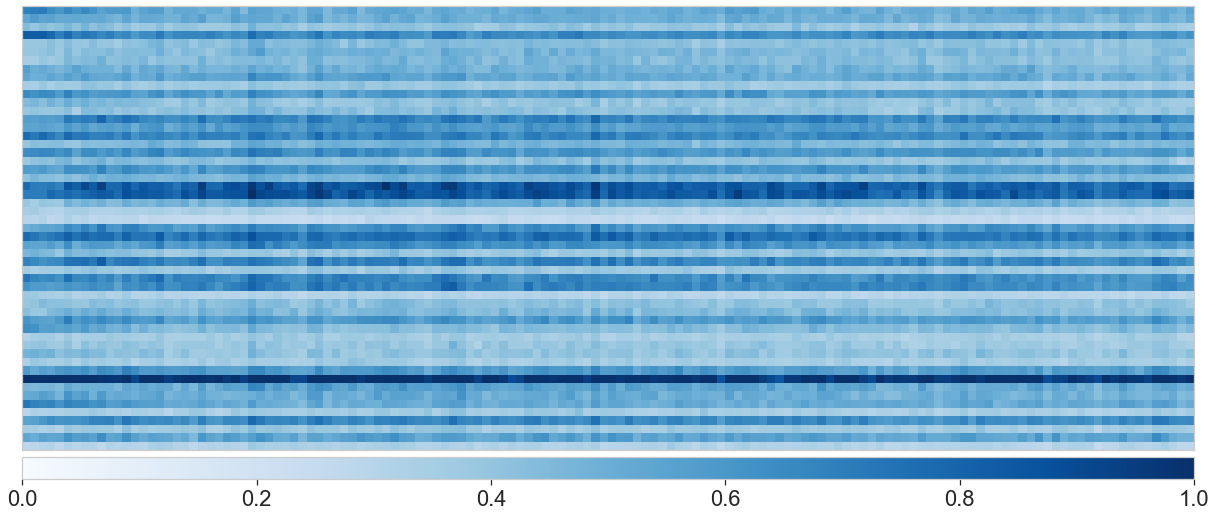

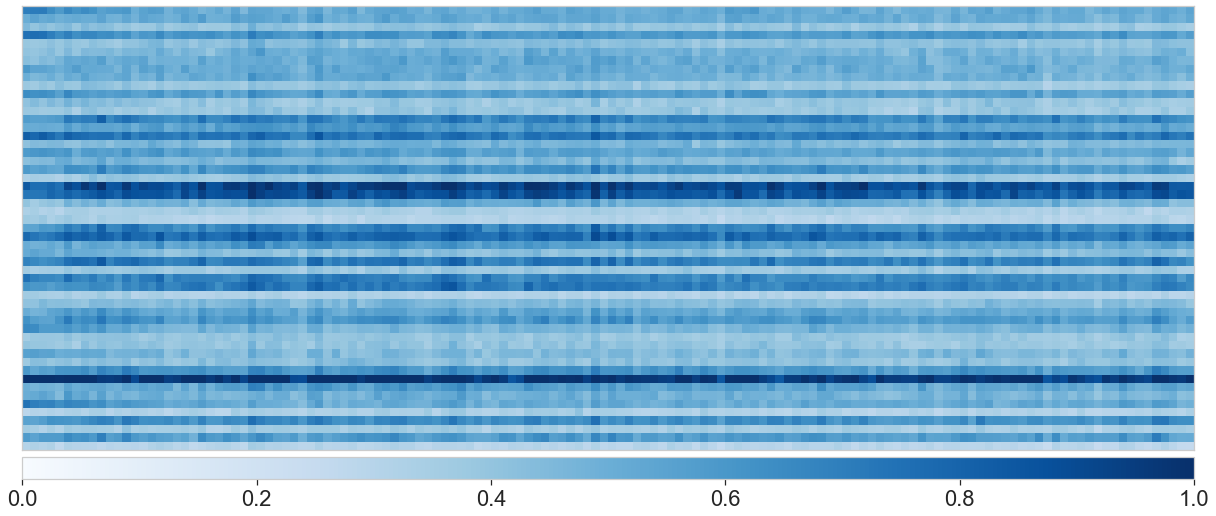

In [8]:
# FBIRN
saliency = Saliency(model)


model.zero_grad()
grads0 = saliency.attribute(feature, target=0)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='negative',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
grads1 = saliency.attribute(feature, target=1)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

Approximation delta:  tensor([1.3771, 1.9372, 0.7474, 0.7003, 1.4118, 1.8759, 0.2592, 2.1142, 0.8776,
        0.0512, 0.8464, 1.0452, 1.1662, 1.6665, 1.3897, 1.0584, 0.9030, 1.5872,
        0.6320, 0.6673, 2.0666, 1.1034, 0.3106, 0.4501, 1.0902, 0.3197, 0.3657,
        1.2371, 1.3292, 1.1216, 0.6873, 0.8768, 1.1971, 0.8025, 0.4185, 0.9555,
        0.2338, 1.4164, 0.6298, 0.8181, 0.7341, 1.9899, 0.6859, 1.3105, 2.2623,
        0.4232, 0.6788, 0.0391, 1.0575, 1.0697, 0.5106, 1.2368, 0.9015, 0.4901,
        0.6627, 0.7923, 1.4857, 1.2374, 1.2126, 1.0612, 0.6295, 0.4370, 0.7843,
        1.1408, 1.5110, 0.2273, 0.2003, 2.1419, 1.8220, 1.5897, 1.5855, 0.2589,
        0.9228, 0.4105, 0.7144, 1.1203, 0.9877, 1.2999, 0.8140, 1.8817, 1.3910,
        0.5089, 1.6694, 1.8345, 0.8889, 0.5441, 1.6181, 0.6486, 1.1548, 1.5298,
        1.5127, 1.8817, 3.0389, 1.7231, 0.8866, 0.4961, 0.1766, 1.5637, 1.5907,
        1.8883, 0.1755, 1.7673, 1.4965, 0.7370, 0.0295, 0.7974, 0.5402, 3.5255,
        0.9333, 1.

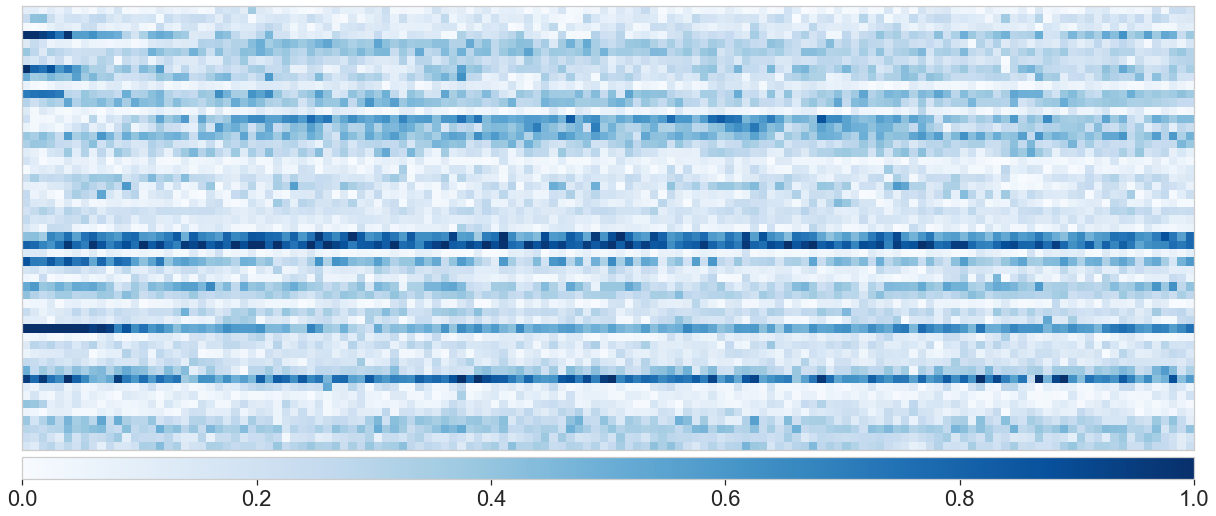

Approximation delta:  tensor([1.1343e+00, 1.4027e+00, 6.3710e-01, 6.1580e-01, 1.0855e+00, 1.5694e+00,
        3.3417e-01, 1.7737e+00, 7.3650e-01, 1.9500e-01, 5.3111e-01, 7.4867e-01,
        8.9579e-01, 1.2809e+00, 1.2049e+00, 8.8666e-01, 7.2675e-01, 1.1616e+00,
        3.5513e-01, 3.4401e-01, 1.6441e+00, 1.0579e+00, 2.3886e-01, 4.1779e-01,
        9.4170e-01, 2.1013e-01, 3.6127e-01, 8.6961e-01, 1.3338e+00, 8.8791e-01,
        5.1729e-01, 5.0005e-01, 9.8345e-01, 7.8142e-01, 5.1947e-01, 6.6905e-01,
        2.1558e-01, 9.5080e-01, 4.0736e-01, 5.6318e-01, 4.8147e-01, 1.5437e+00,
        5.1683e-01, 5.8440e-01, 1.6304e+00, 2.6722e-01, 2.3423e-01, 4.6013e-02,
        5.9282e-01, 8.0924e-01, 3.3539e-01, 8.8086e-01, 5.1974e-01, 2.9713e-01,
        3.8734e-01, 7.6959e-01, 1.2754e+00, 9.2774e-01, 9.2274e-01, 9.9630e-01,
        6.5352e-01, 3.2212e-01, 6.2548e-01, 1.0691e+00, 1.1185e+00, 2.6658e-01,
        1.5581e-03, 1.5796e+00, 1.3041e+00, 1.0454e+00, 1.3381e+00, 1.5290e-01,
        5.7656e-01

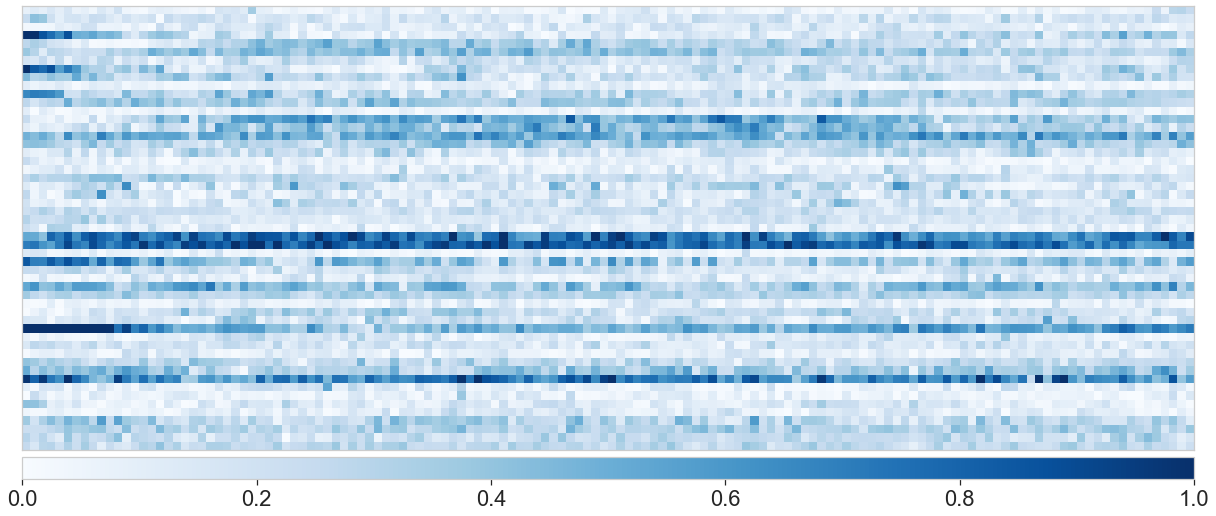

In [9]:
# FBIRN
ig = IntegratedGradients(model)


model.zero_grad()
attr_ig0, delta = ig.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig1, delta = ig.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

In [ ]:
# FBIRN
ig = IntegratedGradients(model)
nt = NoiseTunnel(ig)


model.zero_grad()
attr_ig_nt0, delta = nt.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig_nt1, delta = nt.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()



### OASIS

In [6]:
# OASIS
features, labels = load_OASIS()
features = np.swapaxes(features, 1, 2)  # [n_samples; seq_len; n_features]

In [7]:
# OASIS
# one-sample
# feature = features[5].astype(np.float32)
# feature = torch.tensor(feature).unsqueeze(0)
# feature.requires_grad = True
# all
feature = features.astype(np.float32)
feature = torch.tensor(feature)
feature.requires_grad = True

# check dimensions
print(feature.shape)

torch.Size([912, 156, 53])


In [9]:
# OASIS
from src.scripts.tune_ts_mlp_oasis import MLP
# AUC: 0.7702583675866118
model = MLP(
    input_size=53, 
    output_size=2,
    hidden_size=152, 
    num_layers=2, 
    dropout=0.49997745820615697,
)
logdir = LOGS_ROOT.joinpath("220428.205425-ts-mlp-oasis-qFalse/0023/model.best.pth")
checkpoint = torch.load(logdir, map_location=lambda storage, loc: storage)
# print(checkpoint)
model.load_state_dict(checkpoint)

model = model.eval()
# ATTENTION: captum model should have [bs; ...] inputs and [bs; ...] outputs
# output = torch.sigmoid(model(feature))

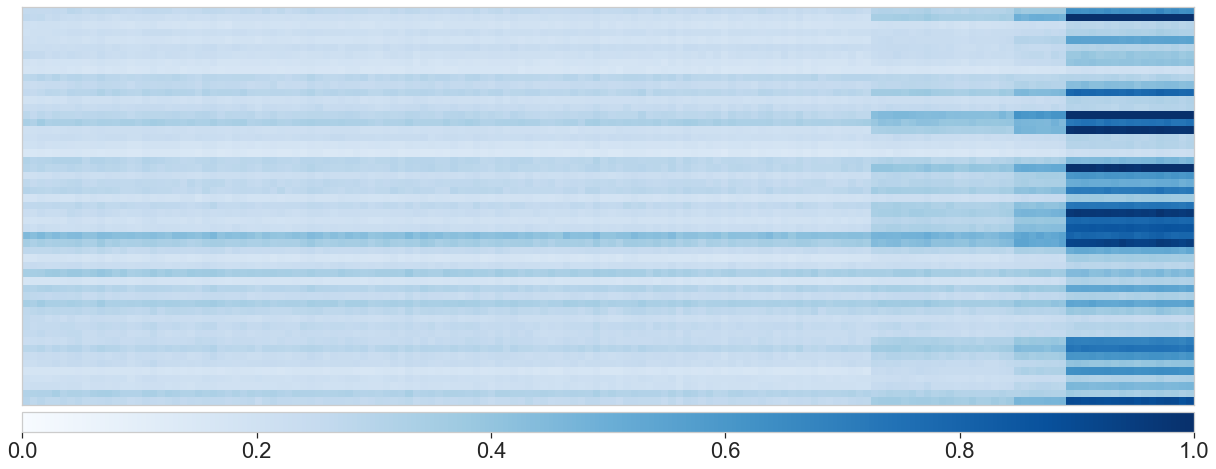

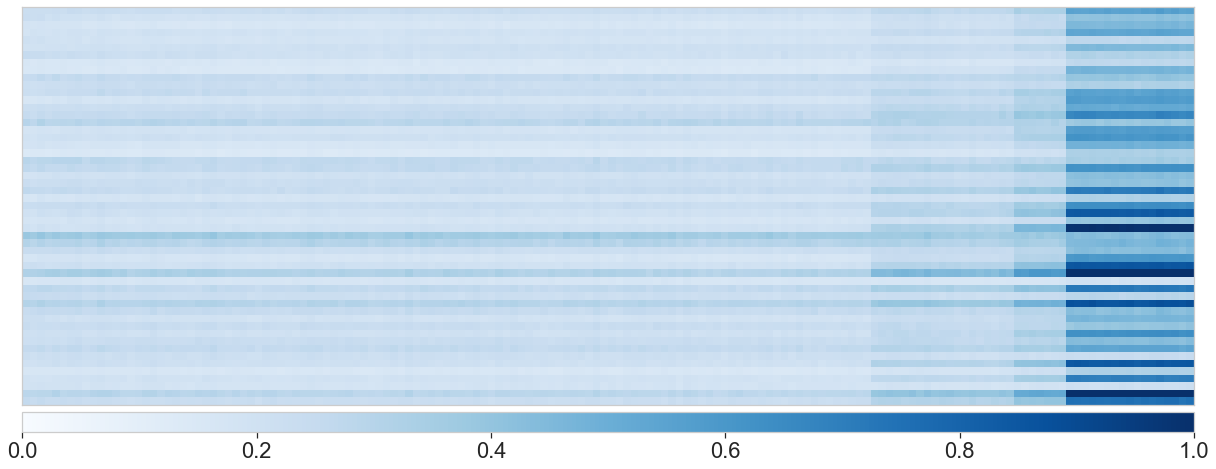

In [10]:
# OASIS
saliency = Saliency(model)


model.zero_grad()
grads0 = saliency.attribute(feature, target=0)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='negative',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
grads1 = saliency.attribute(feature, target=1)
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
# transpose to [num_features; time_len; 1]
_ = viz.visualize_image_attr(
    np.transpose(grads1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),  
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

Approximation delta:  tensor([ 2.6768,  4.1249,  1.5854,  2.4251,  1.4974,  4.1987,  2.0176,  1.1100,
         3.0077,  3.1687,  6.6959,  5.8428,  2.5821,  1.9454,  4.7605,  2.3328,
         7.3754,  3.6939,  1.6451,  6.6578,  2.2040,  4.6429,  6.4082,  2.8295,
         5.7302,  2.4540,  3.7079,  1.4601,  5.3767,  2.5217,  2.5316,  1.9098,
         3.9323,  1.2832,  7.7430,  1.7746,  2.8148,  1.1868,  4.8508,  1.1369,
         7.2318,  5.3071,  5.0963,  2.6079,  3.5509,  5.1095,  2.2922,  4.4267,
         6.5744,  2.3789,  3.8326,  4.8303,  6.2046,  3.4590,  3.2663,  3.8831,
         3.3364,  3.0242,  0.1249,  3.1820,  3.0697,  4.5697,  3.0116,  4.0382,
         6.5910,  5.0093,  4.0995,  1.6156,  1.9314,  4.9137,  1.5078,  1.0360,
         5.7241,  2.7686,  3.2602,  2.4117,  2.2243,  0.4571,  1.1491,  2.1677,
         2.7687,  4.3577,  7.8493,  5.0967,  2.7239,  2.8320,  6.0934,  2.2285,
         2.3681,  5.6308,  2.3630,  3.8752,  5.3034,  6.4075,  2.1861,  3.5434,
         3.9797,  

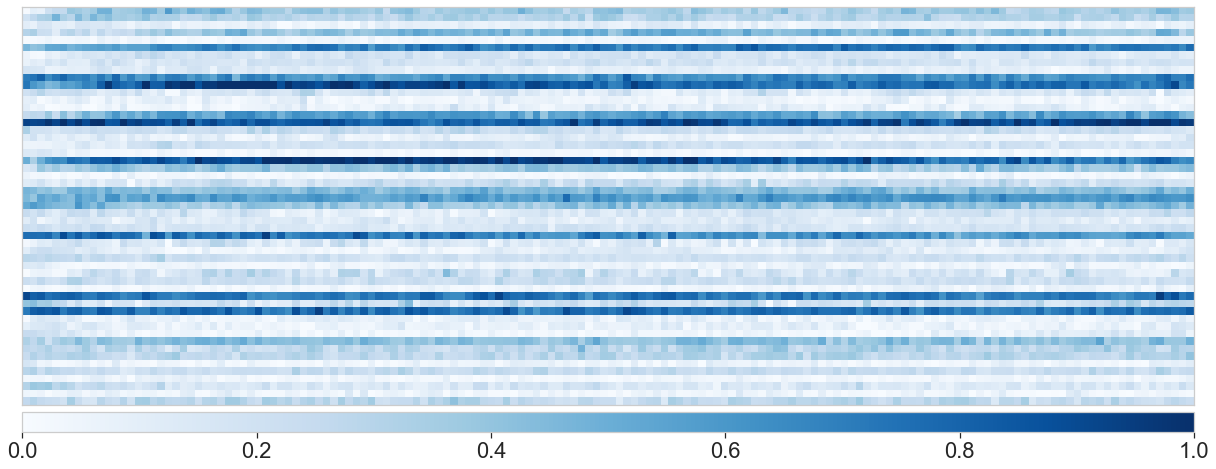

Approximation delta:  tensor([ 3.2800,  4.7158,  1.8957,  2.8244,  1.7683,  4.9130,  2.3698,  1.2055,
         3.4766,  3.4401,  7.5624,  6.7857,  3.0277,  2.0889,  5.3429,  2.5641,
         8.4129,  4.1620,  1.8801,  7.6900,  2.7510,  5.4191,  7.3573,  3.2585,
         6.4950,  2.9369,  4.3469,  1.5158,  6.1075,  3.1518,  2.6856,  2.2344,
         4.5953,  1.4740,  8.5637,  2.0169,  3.3885,  1.4866,  5.5281,  1.3518,
         8.0341,  5.9736,  5.8731,  3.0425,  4.3734,  5.6712,  2.5798,  5.0286,
         7.2779,  2.8703,  4.3812,  5.5341,  6.8643,  4.0070,  3.7646,  4.5856,
         3.6537,  3.5451,  0.1819,  3.6748,  3.5918,  5.2717,  3.6031,  4.5857,
         7.6168,  5.6510,  4.8466,  1.9024,  2.1139,  5.6467,  1.7692,  1.2065,
         6.4804,  3.1220,  3.8265,  2.7920,  2.5021,  0.4606,  1.3177,  2.4653,
         3.1337,  5.0420,  9.1966,  5.8248,  2.9898,  3.2194,  7.0309,  2.4297,
         2.6616,  6.3244,  2.9125,  4.4634,  5.8760,  7.4118,  2.4873,  4.2172,
         4.5732,  

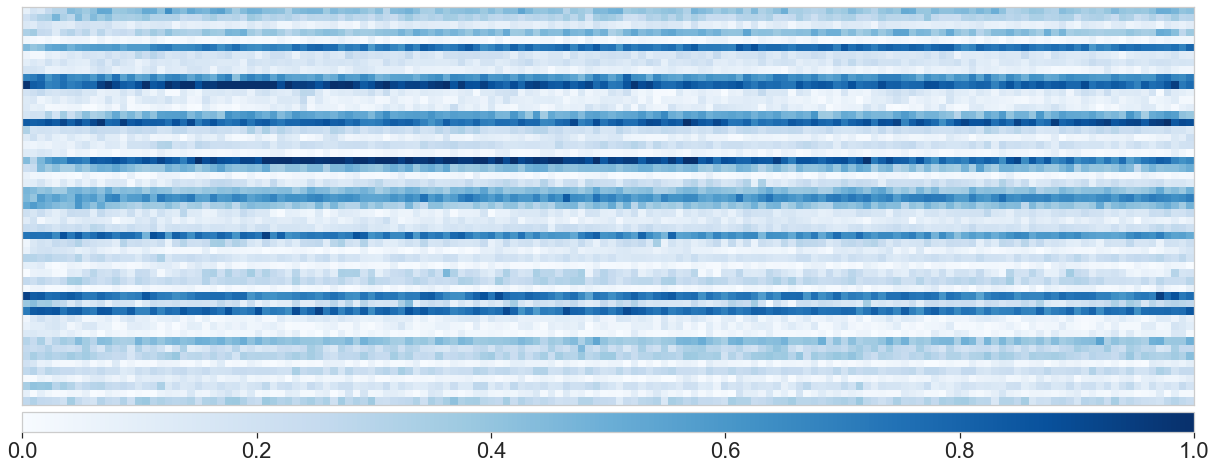

In [11]:
# OASIS
ig = IntegratedGradients(model)


model.zero_grad()
attr_ig0, delta = ig.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig1, delta = ig.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    # outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()

In [12]:
# OASIS
ig = IntegratedGradients(model)
nt = NoiseTunnel(ig)


model.zero_grad()
attr_ig_nt0, delta = nt.attribute(
    inputs=feature,
    target=0,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt0.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()


model.zero_grad()
attr_ig_nt1, delta = nt.attribute(
    inputs=feature,
    target=1,
    baselines=torch.zeros_like(feature),
    return_convergence_delta=True,
    nt_type='smoothgrad_sq',
    nt_samples=5, 
    stdevs=0.2
)
print('Approximation delta: ', abs(delta))
fig, axs = plt.subplots(1, 1, figsize=(21, 9))
_ = viz.visualize_image_attr(
    np.transpose(attr_ig_nt1.cpu().detach().numpy(), (2,1,0)),
    np.transpose(feature.cpu().detach().numpy(), (2,1,0)),
    method='heat_map',
    # cmap=default_cmap,
    show_colorbar=True,
    # sign='positive',
    outlier_perc=1,
    plt_fig_axis=(fig, axs),
    use_pyplot=False,
)
plt.show()
plt.close()



Error: Canceled future for execute_request message before replies were done